# Exploring Text

In this lesson, we'll be taking a look at a data set that contains SMS messages that are labelled as either a spam text message, or a valid, a.k text message.

In [1]:
import pandas as pd
df = pd.read_csv('spam.csv', 
                 encoding='latin-1',
                 usecols=[0,1]) # use first 2 columns only to get rid of unnamed columns full of nans
df.columns = ['label', 'text']
df.head()
# df.isnull().sum()

# df.info()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
labels = pd.concat([df.label.value_counts(), # get total counts of ham vs spam
                    df.label.value_counts(normalize=True)], axis=1) # getting the prop of ham vs. spam
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


________________________

Clean the text (see [data prep lesson](https://ds.codeup.com/nlp/prepare/#removing-accented-characters)) and create 3 sets of words: 

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [3]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
import acquire, prepare

def basic_clean(text):
    text = (unicodedata.normalize('NFKD', text.lower())
            .encode('ascii', 'ignore') # ascii to reduce noise
            .decode('utf-8', 'ignore') # decode using utf-8
           )
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [5]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [6]:
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [7]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [8]:
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [9]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords


In [10]:
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


Add a column with list of words

In [11]:
# (a|b)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [12]:
# df.words
# for i in range(len(df.text_filtered)):
#     re.sub(r'([^a-z0-9\s]|\s.\s)', '', df.text_filtered[i]).split()
    
# def clean_more():
#     words = re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered
#     return

# df.text_filtered.apply(clean_more)

# [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc)]

In [13]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


**Exploring all the words together, Not by document**

- any common words that you're missing from the stopword list...noise that is still in your data. 
- common words that are spelled differently across the documents
- Are there words more common in spam than ham? vice versa?

**Exploring documents**

- exploring n-grams, phrases. bi-grams are 2-word phrases, tri-grams are 3-word phrases, 4-gram, ...

To finalize prep for exploration: 

1. add a feature that is the length of each document. 
2. build a set of ham_words and spam_words to epxlore. 

In [14]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

spam_words

'free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darlingweek word back id like fun still tb ok xxx std chgs send i12150 rcv winner valued network customer selected receivea i12900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 monthr entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hlinfo urgentweek free membership i12100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl englandmacedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txti14120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged i125month please confirm replying y

Once we have a list of words, we can transform it into a pandas `Series`, which we can then use to show us how often each of the words occurs.

In [15]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

call    552
im      450
get     351
ur      343
dont    257
dtype: int64

Now we'll combine these three together to get one resulting data frame that we can work with:

In [16]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


We can now use this data set to answer some interesting questions:

- Are there words that should be added to the stopword list? 
- Are there words that are significantly more likely to occur in spam than in ham? 

In [17]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,552,210,342
im,450,436,13
get,351,278,73
ur,343,220,125
dont,257,237,19
ok,251,246,5
ltgt,248,248,0
go,247,219,27
free,240,49,191
know,227,214,13


**Takeaways**

- what do you see? 



In [18]:
word_counts[word_counts.spam==0].sort_values(by='ham').tail(5)

,all,ham,spam
say,107,107,0
later,119,118,0
da,121,121,0
lor,129,129,0
ltgt,248,248,0


**Takeaways**

- what do you see? 

In [19]:
word_counts[word_counts.ham<5].sort_values(by='spam').tail(10)

,all,ham,spam
awarded,38,0,38
18,41,0,41
16,45,1,46
tc,51,2,49
guaranteed,50,0,50
urgent,60,2,59
tone,60,0,60
nokia,63,1,62
prize,82,0,82
claim,96,0,96


### Document Word Count

The length of documents is often a good feature. 

In [20]:
len(df.words[0])

12

In [21]:
df['doc_length'] = [len(wordlist) for wordlist in df.words]

In [22]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8


In [23]:
df = df[df.doc_length!=0]

## Visualize

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs. Ham for the 20 most common words in our text sample')

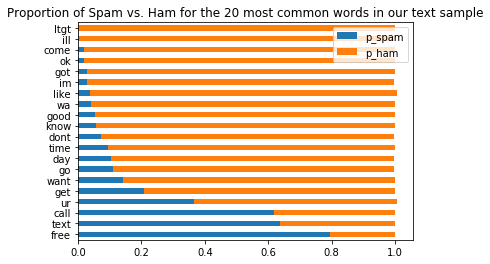

In [25]:
# visualize the percentage of the term in ham vs. spam

(word_counts.assign(p_spam = word_counts.spam/word_counts['all'], 
                   p_ham = word_counts.ham/word_counts['all'])
 .sort_values(by='all')[['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True)
)

plt.title("Proportion of Spam vs. Ham for the 20 most common words in our text sample")

### Word Clouds

```
python -m pip install --upgrade wordcloud
```

The wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.

#### Common Use Cases

As a visualization technique, this method gives a more qualitative analysis of the topics in the documents.
 
#### Pros

1. It’s intuitive and easy to comprehend.
2. It helps identify overall respondent sentiment and the specific factors that drive it.
3. It provides direction for further analysis.

#### Cons

1. It fails to measure each word’s value in and of itself.
2. It allows irrelevant words to appear.
3. When words appear similar in size, it becomes difficult to differentiate them.

First we'll take a look at a simple example:

(-0.5, 399.5, 199.5, -0.5)

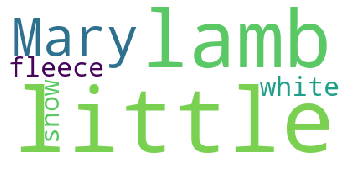

In [26]:
from wordcloud import WordCloud

sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)
plt.imshow(img)

plt.axis('off')

In [27]:
ham_words

'go jurong point crazy available bugisgreat world labuffet cine got amore wat ok lar joking wifonidun say early horc already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam ha set callertune caller presscopy friend callertune im gonna home soon dont want talk stuff anymore tonightive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching ehrememberspell name yesnaughty makewet fine thati12i12s wayfeel thati12i12s way gotaseriously spell name ii12i12i12m going trymonth ha ha joking i12 pay first lar da stock comin aft finish lunch go str lor ardsmth lorfinish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love im

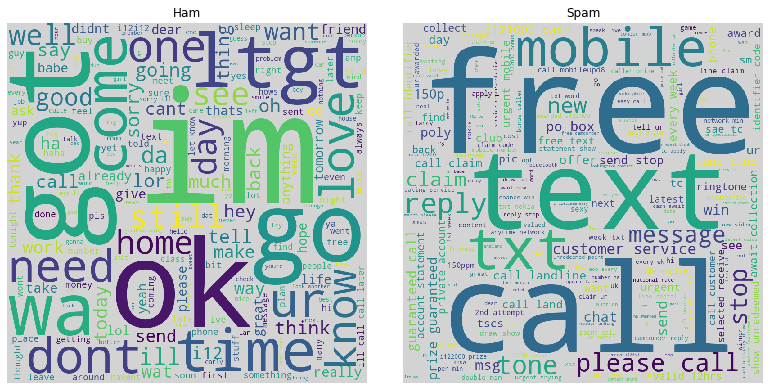

In [28]:
ham_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(spam_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

# Bigrams

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce the bigrams, we'll use `nltk`.

In [29]:
sentence
bigrams = nltk.ngrams(sentence.split(), 2) # n = 2
list(bigrams)

[('Mary', 'had'),
 ('had', 'a'),
 ('a', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb.'),
 ('lamb.', 'Its'),
 ('Its', 'fleece'),
 ('fleece', 'was'),
 ('was', 'white'),
 ('white', 'as'),
 ('as', 'snow.')]

We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.

In [30]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8,"[(nah, dont), (dont, think), (think, go), (go,..."


In [31]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(please, call)          43
(customer, service)     27
(po, box)               23
(guaranteed, call)      23
(prize, guaranteed)     22
(i121000, cash)         20
(every, week)           19
(send, stop)            19
(land, line)            18
(await, collection)     18
(urgent, mobile)        18
(valid, 12hrs)          17
(sae, tc)               16
(claim, call)           16
(account, statement)    16
(identifier, code)      15
(call, mobileupd8)      15
(call, customer)        15
(selected, receive)     15
(reply, call)           15
dtype: int64

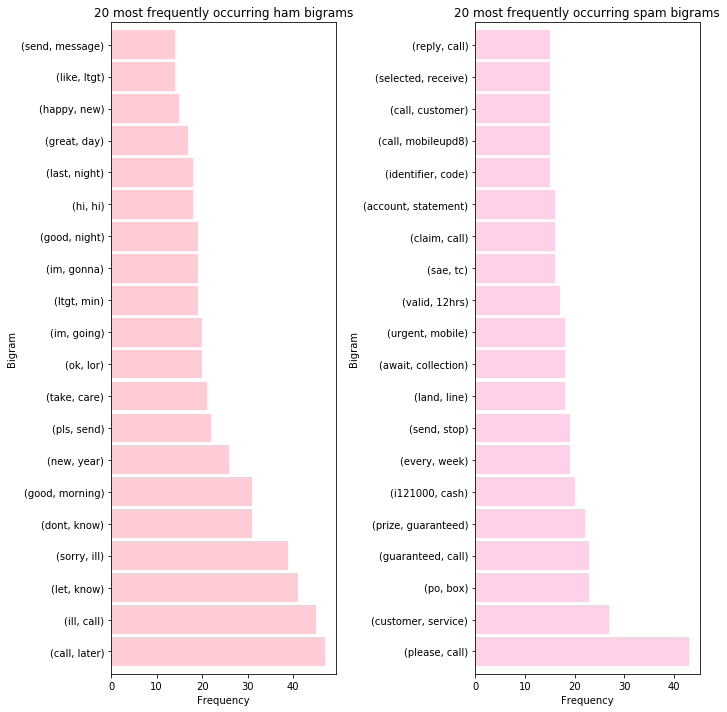

In [32]:
plt.subplot(121)
ham_bigrams.plot.barh(color='pink', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

We can use these bigrams to make a word cloud as well, with a little more effort.

In [33]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
data

{'please call': 43,
 'customer service': 27,
 'po box': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'i121000 cash': 20,
 'every week': 19,
 'send stop': 19,
 'land line': 18,
 'await collection': 18,
 'urgent mobile': 18,
 'valid 12hrs': 17,
 'sae tc': 16,
 'claim call': 16,
 'account statement': 16,
 'identifier code': 15,
 'call mobileupd8': 15,
 'call customer': 15,
 'selected receive': 15,
 'reply call': 15}

(-0.5, 799.5, 399.5, -0.5)

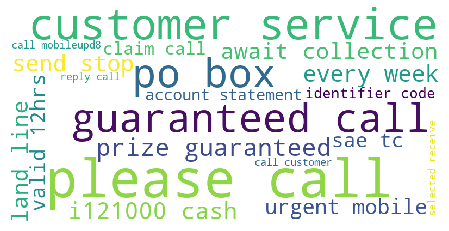

In [34]:
img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

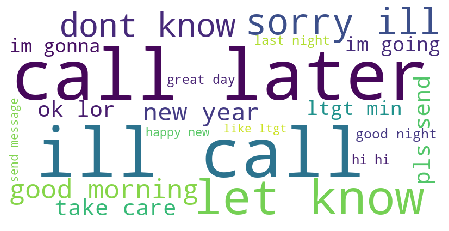

In [35]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
# data

img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')

In [36]:
# sample referring to different data set...but creating a network graph of text. 

import networkx as nx
import string
from sys import maxint

str1 = """Man who run in front of car, get tired.
Man who run behind car, get exhausted."""

wordList1 = str1.split(None)

wordList2 = [string.rstrip(x.lower(), ',.!?;') for x in wordList1]

dG = nx.DiGraph()

for i, word in enumerate(wordList2):
    try:
        next_word = wordList2[i + 1]
        if not dG.has_node(word):
            dG.add_node(word)
            dG.node[word]['count'] = 1
        else:
            dG.node[word]['count'] += 1
        if not dG.has_node(next_word):
            dG.add_node(next_word)
            dG.node[next_word]['count'] = 0

        if not dG.has_edge(word, next_word):
            dG.add_edge(word, next_word, weight=maxint - 1)
        else:
            dG.edge[word][next_word]['weight'] -= 1
    except IndexError:
        if not dG.has_node(word):
            dG.add_node(word)
            dG.node[word]['count'] = 1
        else:
            dG.node[word]['count'] += 1
    except:
        raise
#To see the contents of the graph, you can print the nodes and edges.

for node in dG.nodes():
    print '%s:%d\n' % (node, dG.node[node]['count'])

for edge in dG.edges():
    print '%s:%d\n' % (edge, maxint - dG.edge[edge[0]][edge[1]]['weight'])
 

SyntaxError: invalid syntax (<ipython-input-36-3002de986828>, line 43)

# Exercises

Do your work for this exercise in a file named `explore`.

1. Spam Data

    1. Load the spam data set.
    1. Create and explore bigrams for the spam data. Visualize them with a word
       cloud. How do they compare with the ham bigrams?
    1. Is there any overlap in the bigrams for the spam data and the ham data?
    1. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
       the spam and ham data.
    1. bonus: plot document length information of spam vs. ham. Does there appear to be a difference? 

1. Explore the blog articles using the techniques discussed in the exploration
   lesson.

1. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the `category` variable when exploring.


### E. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [37]:
sentence
trigrams = nltk.ngrams(sentence.split(), 3) # n = 2
list(trigrams)

[('Mary', 'had', 'a'),
 ('had', 'a', 'little'),
 ('a', 'little', 'lamb,'),
 ('little', 'lamb,', 'little'),
 ('lamb,', 'little', 'lamb,'),
 ('little', 'lamb,', 'little'),
 ('lamb,', 'little', 'lamb.'),
 ('little', 'lamb.', 'Its'),
 ('lamb.', 'Its', 'fleece'),
 ('Its', 'fleece', 'was'),
 ('fleece', 'was', 'white'),
 ('was', 'white', 'as'),
 ('white', 'as', 'snow.')]

In [38]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(private, 2003, account)               13
(2003, account, statement)             13
(reply, call, 08000930705)             13
(camcorder, reply, call)               12
(guaranteed, i121000, cash)            12
(show, 800, unredeemed)                12
(bonus, caller, prize)                 11
(anytime, network, min)                11
(every, week, txt)                     11
(please, call, customer)               10
(i122000, bonus, caller)               10
(customer, service, representative)    10
(cash, await, collection)              10
(trying, contacttoday, draw)            9
(contacttoday, draw, show)              9
(i122000, prize, guaranteed)            9
(750, anytime, network)                 9
dtype: int64

In [39]:
ham_trigrams

(ill, call, later)           38
(sorry, ill, call)           38
(happy, new, year)           13
(pick, phone, right)         12
(cant, pick, phone)          12
(phone, right, pls)          12
(pls, send, message)         12
(right, pls, send)           12
(hi, hi, hi)                 11
(good, morning, dear)         7
(convey, birthday, wish)      6
(pls, convey, birthday)       6
(kiss, across, sea)           6
(wife, didnt, wish)           5
(wa, bday, wife)              5
(went, work, even)            5
(pa, said, happy)             5
(wish, parent, forgotkid)     5
(call, later, meeting)        5
(mood, cameminuts, latr)      5
dtype: int64

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [40]:
df = acquire.get_news_articles(cached=True)
df.head()

,topic,title,author,content
0,business,Moderna's early data shows its COVID-19 vaccin...,Pragya Swastik,American biotechnology company Moderna on Mond...
1,business,15 countries sign world's biggest free-trade p...,Pragya Swastik,Fifteen Asia-Pacific countries signed the Regi...
2,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...
3,business,Reliance Retail buys 96% stake in Urban Ladder...,Rishabh Bhatnagar,Reliance Industries' retail arm Reliance Retai...
4,business,"Reduce foreign funding to 26% by Oct 15, 2021:...",Pragya Swastik,The I&B Ministry on Monday asked digital media...


In [41]:
df['title_cleaned'] = df.title.apply(prepare.basic_clean)
df.head()


,topic,title,author,content,title_cleaned
0,business,Moderna's early data shows its COVID-19 vaccin...,Pragya Swastik,American biotechnology company Moderna on Mond...,modernas early data shows its covid19 vaccine ...
1,business,15 countries sign world's biggest free-trade p...,Pragya Swastik,Fifteen Asia-Pacific countries signed the Regi...,15 countries sign worlds biggest freetrade pac...
2,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,how does modernas covid19 vaccine candidate co...
3,business,Reliance Retail buys 96% stake in Urban Ladder...,Rishabh Bhatnagar,Reliance Industries' retail arm Reliance Retai...,reliance retail buys 96 stake in urban ladder ...
4,business,"Reduce foreign funding to 26% by Oct 15, 2021:...",Pragya Swastik,The I&B Ministry on Monday asked digital media...,reduce foreign funding to 26 by oct 15 2021 go...


In [42]:
df['content_cleaned'] = df.content.apply(basic_clean)
df.head()


,topic,title,author,content,title_cleaned,content_cleaned
0,business,Moderna's early data shows its COVID-19 vaccin...,Pragya Swastik,American biotechnology company Moderna on Mond...,modernas early data shows its covid19 vaccine ...,american biotechnology company moderna on mond...
1,business,15 countries sign world's biggest free-trade p...,Pragya Swastik,Fifteen Asia-Pacific countries signed the Regi...,15 countries sign worlds biggest freetrade pac...,fifteen asiapacific countries signed the regio...
2,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,how does modernas covid19 vaccine candidate co...,modernas initial results of latestage trial sh...
3,business,Reliance Retail buys 96% stake in Urban Ladder...,Rishabh Bhatnagar,Reliance Industries' retail arm Reliance Retai...,reliance retail buys 96 stake in urban ladder ...,reliance industries retail arm reliance retail...
4,business,"Reduce foreign funding to 26% by Oct 15, 2021:...",Pragya Swastik,The I&B Ministry on Monday asked digital media...,reduce foreign funding to 26 by oct 15 2021 go...,the ib ministry on monday asked digital media ...


In [43]:
df['title_tokenized'] = df.title_cleaned.apply(tokenize)
df['title_lemmatized'] = df.title_tokenized.apply(lemmatize)
df['title_filtered'] = df.title_lemmatized.apply(remove_stopwords)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.title_filtered]
df_title = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df_title.head()

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,words
0,business,Moderna's early data shows its COVID-19 vaccin...,Pragya Swastik,American biotechnology company Moderna on Mond...,modernas early data shows its covid19 vaccine ...,american biotechnology company moderna on mond...,modernas early data shows its covid19 vaccine ...,modernas early data show it covid19 vaccine is...,modernas early data show covid19 vaccine 945 e...,"[modernas, early, data, show, covid19, vaccine..."
1,business,15 countries sign world's biggest free-trade p...,Pragya Swastik,Fifteen Asia-Pacific countries signed the Regi...,15 countries sign worlds biggest freetrade pac...,fifteen asiapacific countries signed the regio...,15 countries sign worlds biggest freetrade pac...,15 country sign world biggest freetrade pact w...,15 country sign world biggest freetrade pact i...,"[15, country, sign, world, biggest, freetrade,..."
2,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,how does modernas covid19 vaccine candidate co...,modernas initial results of latestage trial sh...,how does modernas covid19 vaccine candidate co...,how doe modernas covid19 vaccine candidate com...,doe modernas covid19 vaccine candidate compare...,"[doe, modernas, covid19, vaccine, candidate, c..."
3,business,Reliance Retail buys 96% stake in Urban Ladder...,Rishabh Bhatnagar,Reliance Industries' retail arm Reliance Retai...,reliance retail buys 96 stake in urban ladder ...,reliance industries retail arm reliance retail...,reliance retail buys 96 stake in urban ladder ...,reliance retail buy 96 stake in urban ladder f...,reliance retail buy 96 stake urban ladder 182 ...,"[reliance, retail, buy, 96, stake, urban, ladd..."
4,business,"Reduce foreign funding to 26% by Oct 15, 2021:...",Pragya Swastik,The I&B Ministry on Monday asked digital media...,reduce foreign funding to 26 by oct 15 2021 go...,the ib ministry on monday asked digital media ...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding 26 oct 15 2021 govt dig...,"[reduce, foreign, funding, 26, oct, 15, 2021, ..."


In [44]:
df['content_tokenized'] = df.content_cleaned.apply(tokenize)
df['content_lemmatized'] = df.content_tokenized.apply(lemmatize)
df['content_filtered'] = df.content_lemmatized.apply(remove_stopwords)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.content_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,content_tokenized,content_lemmatized,content_filtered,words
0,business,Moderna's early data shows its COVID-19 vaccin...,Pragya Swastik,American biotechnology company Moderna on Mond...,modernas early data shows its covid19 vaccine ...,american biotechnology company moderna on mond...,modernas early data shows its covid19 vaccine ...,modernas early data show it covid19 vaccine is...,modernas early data show covid19 vaccine 945 e...,american biotechnology company moderna on mond...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo..."
1,business,15 countries sign world's biggest free-trade p...,Pragya Swastik,Fifteen Asia-Pacific countries signed the Regi...,15 countries sign worlds biggest freetrade pac...,fifteen asiapacific countries signed the regio...,15 countries sign worlds biggest freetrade pac...,15 country sign world biggest freetrade pact w...,15 country sign world biggest freetrade pact i...,fifteen asiapacific countries signed the regio...,fifteen asiapacific country signed the regiona...,fifteen asiapacific country signed regional co...,"[fifteen, asiapacific, country, signed, region..."
2,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,how does modernas covid19 vaccine candidate co...,modernas initial results of latestage trial sh...,how does modernas covid19 vaccine candidate co...,how doe modernas covid19 vaccine candidate com...,doe modernas covid19 vaccine candidate compare...,modernas initial results of latestage trial sh...,modernas initial result of latestage trial sho...,modernas initial result latestage trial show c...,"[modernas, initial, result, latestage, trial, ..."
3,business,Reliance Retail buys 96% stake in Urban Ladder...,Rishabh Bhatnagar,Reliance Industries' retail arm Reliance Retai...,reliance retail buys 96 stake in urban ladder ...,reliance industries retail arm reliance retail...,reliance retail buys 96 stake in urban ladder ...,reliance retail buy 96 stake in urban ladder f...,reliance retail buy 96 stake urban ladder 182 ...,reliance industries retail arm reliance retail...,reliance industry retail arm reliance retail v...,reliance industry retail arm reliance retail v...,"[reliance, industry, retail, arm, reliance, re..."
4,business,"Reduce foreign funding to 26% by Oct 15, 2021:...",Pragya Swastik,The I&B Ministry on Monday asked digital media...,reduce foreign funding to 26 by oct 15 2021 go...,the ib ministry on monday asked digital media ...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding 26 oct 15 2021 govt dig...,the ib ministry on monday asked digital media ...,the ib ministry on monday asked digital medium...,ib ministry monday asked digital medium compan...,"[ib, ministry, monday, asked, digital, medium,..."


In [45]:
business_words = ' '.join(df[df.topic=='business'].content_filtered)
sports_words = ' '.join(df[df.topic=='sports'].content_filtered)
tech_words = ' '.join(df[df.topic=='technology'].content_filtered)
ent_words = ' '.join(df[df.topic=='entertainment'].content_filtered)
all_words = ' '.join(df.content_filtered)

business_words = re.sub(r'\s.\s', '', business_words)
sports_words = re.sub(r'\s.\s', '', sports_words)
tech_words = re.sub(r'\s.\s', '', tech_words)
ent_words = re.sub(r'\s.\s', '', ent_words)
all_words = re.sub(r'\s.\s', '', all_words)

sports_words

'london olympics fencing gold medalist ruben limardo ha working delivery boy poland generate income amid covid19 limardo shared picture instagram wrote proudly say addition sport ive second job earn living maintain home adjusting change definitely job brave added reacting former england captain michael vaughan reckon mumbai indian would win t20 world cup tweet franchise owner akash ambani said wa best comment saw whole day vaughan posted tweet ipl 2020 final wa going mumbai indian ipl 2020 fifth ipl trophy virat kohli wa called hypocrite social medium urging people burst cracker diwali despite firework visuals seen birthday video shared rcb ipl franchise issued clarification tweeted firework showninvideo wa archival footage uaes flag day celebration rcb continues work hard protectenvironment like weve year picture karachi king west indian batsman sherfane rutherford wearing mumbai indian glove batting pakistan super league qualifier ha gone viral social medium reacting fan tweeted huge

### Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [46]:
business_freq = pd.Series(business_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
tech_freq = pd.Series(tech_words.split()).value_counts()
ent_freq = pd.Series(ent_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

sports_freq.head()

said       17
test       13
player     12
league     11
cricket    11
dtype: int64

### Now we'll combine these 5 together to get one resulting data frame that we can work with:

In [47]:
word_counts = (pd.concat([business_freq, sports_freq, tech_freq, ent_freq, all_freq], axis=1, sort=True)
               .set_axis(['business', 'sports', 'technology','entertainment','all'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,business,sports,technology,entertainment,all
01,0,0,1,0,1
10,2,2,0,0,4
100,0,1,0,0,1
103,1,0,0,0,1
1030,0,0,1,0,1


### We can now use this data set to answer some interesting questions:
- Are there words that should be added to the stopword list?
- Are there words that are significantly more likely to occur in multiple topics?

In [48]:
# which words show up more

word_counts.sort_values(by='all', ascending=False).head(10)

,business,sports,technology,entertainment,all
said,13,17,11,16,57
ha,9,9,19,8,45
wa,9,8,8,7,32
india,16,7,2,3,28
actor,0,0,0,18,18
added,2,6,3,6,17
test,0,13,2,0,15
data,8,0,7,0,15
user,0,0,13,0,13
film,0,0,4,9,13


In [49]:
# words that I would assume are sports related
word_counts[word_counts.business==0].sort_values(by='sports').tail(10)

,business,sports,technology,entertainment,all
captain,0,6,0,0,6
series,0,7,1,1,9
big,0,7,1,1,9
bash,0,7,0,0,7
cup,0,9,0,0,9
league,0,11,0,0,11
cricket,0,11,0,0,11
former,0,11,0,1,12
player,0,12,0,0,12
test,0,13,2,0,15


In [50]:
word_counts[word_counts.entertainment==0].sort_values(by='business').tail(10)

,business,sports,technology,entertainment,all
motor,6,0,0,0,6
monday,6,0,3,0,9
million,6,0,1,0,7
nissan,7,0,0,0,7
investment,7,0,1,0,8
crore,8,0,0,0,8
sale,8,0,0,0,8
data,8,0,7,0,15
stake,9,0,0,0,9
vaccine,12,0,0,0,12


### Document word count

In [53]:
len(df.words[0])

df['doc_length'] = [len(wordlist) for wordlist in df.words]
df.head()

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,content_tokenized,content_lemmatized,content_filtered,words,doc_length
0,business,Moderna's early data shows its COVID-19 vaccin...,Pragya Swastik,American biotechnology company Moderna on Mond...,modernas early data shows its covid19 vaccine ...,american biotechnology company moderna on mond...,modernas early data shows its covid19 vaccine ...,modernas early data show it covid19 vaccine is...,modernas early data show covid19 vaccine 945 e...,american biotechnology company moderna on mond...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo...",39
1,business,15 countries sign world's biggest free-trade p...,Pragya Swastik,Fifteen Asia-Pacific countries signed the Regi...,15 countries sign worlds biggest freetrade pac...,fifteen asiapacific countries signed the regio...,15 countries sign worlds biggest freetrade pac...,15 country sign world biggest freetrade pact w...,15 country sign world biggest freetrade pact i...,fifteen asiapacific countries signed the regio...,fifteen asiapacific country signed the regiona...,fifteen asiapacific country signed regional co...,"[fifteen, asiapacific, country, signed, region...",44
2,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,how does modernas covid19 vaccine candidate co...,modernas initial results of latestage trial sh...,how does modernas covid19 vaccine candidate co...,how doe modernas covid19 vaccine candidate com...,doe modernas covid19 vaccine candidate compare...,modernas initial results of latestage trial sh...,modernas initial result of latestage trial sho...,modernas initial result latestage trial show c...,"[modernas, initial, result, latestage, trial, ...",38
3,business,Reliance Retail buys 96% stake in Urban Ladder...,Rishabh Bhatnagar,Reliance Industries' retail arm Reliance Retai...,reliance retail buys 96 stake in urban ladder ...,reliance industries retail arm reliance retail...,reliance retail buys 96 stake in urban ladder ...,reliance retail buy 96 stake in urban ladder f...,reliance retail buy 96 stake urban ladder 182 ...,reliance industries retail arm reliance retail...,reliance industry retail arm reliance retail v...,reliance industry retail arm reliance retail v...,"[reliance, industry, retail, arm, reliance, re...",43
4,business,"Reduce foreign funding to 26% by Oct 15, 2021:...",Pragya Swastik,The I&B Ministry on Monday asked digital media...,reduce foreign funding to 26 by oct 15 2021 go...,the ib ministry on monday asked digital media ...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding 26 oct 15 2021 govt dig...,the ib ministry on monday asked digital media ...,the ib ministry on monday asked digital medium...,ib ministry monday asked digital medium compan...,"[ib, ministry, monday, asked, digital, medium,...",38


In [54]:
# looking for zero word count
df[df.doc_length == 0]

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,content_tokenized,content_lemmatized,content_filtered,words,doc_length


# Visualize

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 936x504 with 0 Axes>

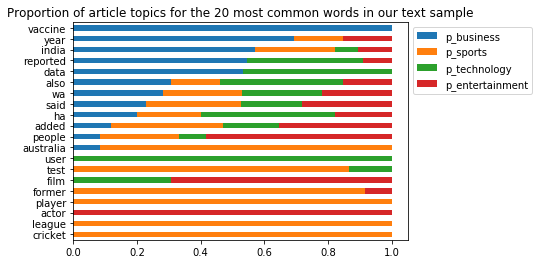

In [63]:
# visualize the percentage of the term in ham vs. spam
plt.figure(figsize = (13,7))
(word_counts.assign(p_business = word_counts.business/word_counts['all'], 
                   p_sports = word_counts.sports/word_counts['all'],
                   p_technology = word_counts.technology/word_counts['all'],
                   p_entertainment = word_counts.entertainment/word_counts['all'],)
 .sort_values(by='all')[['p_business', 'p_sports','p_technology','p_entertainment']]
 .tail(20)
 .sort_values('p_business')
 .plot.barh(stacked=True)
)

plt.title("Proportion of article topics for the 20 most common words in our text sample")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# Word Clouds

IndexError: list index out of range

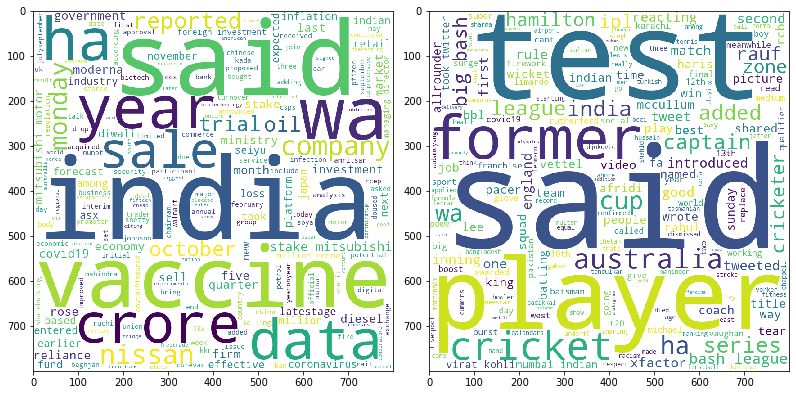

In [66]:
business_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(business_words)

sports_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(sports_words)

tech_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(tech_words)

ent_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(ent_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0,0].imshow(business_cloud)
axs[0,1].imshow(sports_cloud)
axs[1,0].imshow(tech_cloud)
axs[1,1].imshow(ent_cloud)

axs[0,0].set_title('Business')
axs[0,1].set_title('Sports')
axs[1,0].set_title('Technology')
axs[1,1].set_title('Entertainment')

for ax in axs: ax.axis()

# Bigrams
- Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.
- To produce the bigrams, we'll use nltk.

In [67]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,content_tokenized,content_lemmatized,content_filtered,words,doc_length,bigrams
0,business,Moderna's early data shows its COVID-19 vaccin...,Pragya Swastik,American biotechnology company Moderna on Mond...,modernas early data shows its covid19 vaccine ...,american biotechnology company moderna on mond...,modernas early data shows its covid19 vaccine ...,modernas early data show it covid19 vaccine is...,modernas early data show covid19 vaccine 945 e...,american biotechnology company moderna on mond...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo...",39,"[(american, biotechnology), (biotechnology, co..."
1,business,15 countries sign world's biggest free-trade p...,Pragya Swastik,Fifteen Asia-Pacific countries signed the Regi...,15 countries sign worlds biggest freetrade pac...,fifteen asiapacific countries signed the regio...,15 countries sign worlds biggest freetrade pac...,15 country sign world biggest freetrade pact w...,15 country sign world biggest freetrade pact i...,fifteen asiapacific countries signed the regio...,fifteen asiapacific country signed the regiona...,fifteen asiapacific country signed regional co...,"[fifteen, asiapacific, country, signed, region...",44,"[(fifteen, asiapacific), (asiapacific, country..."
2,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,how does modernas covid19 vaccine candidate co...,modernas initial results of latestage trial sh...,how does modernas covid19 vaccine candidate co...,how doe modernas covid19 vaccine candidate com...,doe modernas covid19 vaccine candidate compare...,modernas initial results of latestage trial sh...,modernas initial result of latestage trial sho...,modernas initial result latestage trial show c...,"[modernas, initial, result, latestage, trial, ...",38,"[(modernas, initial), (initial, result), (resu..."
3,business,Reliance Retail buys 96% stake in Urban Ladder...,Rishabh Bhatnagar,Reliance Industries' retail arm Reliance Retai...,reliance retail buys 96 stake in urban ladder ...,reliance industries retail arm reliance retail...,reliance retail buys 96 stake in urban ladder ...,reliance retail buy 96 stake in urban ladder f...,reliance retail buy 96 stake urban ladder 182 ...,reliance industries retail arm reliance retail...,reliance industry retail arm reliance retail v...,reliance industry retail arm reliance retail v...,"[reliance, industry, retail, arm, reliance, re...",43,"[(reliance, industry), (industry, retail), (re..."
4,business,"Reduce foreign funding to 26% by Oct 15, 2021:...",Pragya Swastik,The I&B Ministry on Monday asked digital media...,reduce foreign funding to 26 by oct 15 2021 go...,the ib ministry on monday asked digital media ...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding to 26 by oct 15 2021 go...,reduce foreign funding 26 oct 15 2021 govt dig...,the ib ministry on monday asked digital media ...,the ib ministry on monday asked digital medium...,ib ministry monday asked digital medium compan...,"[ib, ministry, monday, asked, digital, medium,...",38,"[(ib, ministry), (ministry, monday), (monday, ..."


In [69]:
business_bigrams = pd.Series(list(nltk.ngrams(business_words.split(), 2))).value_counts().head(20)
sports_bigrams = pd.Series(list(nltk.ngrams(sports_words.split(), 2))).value_counts().head(20)
tech_bigrams = pd.Series(list(nltk.ngrams(tech_words.split(), 2))).value_counts().head(20)
ent_bigrams = pd.Series(list(nltk.ngrams(ent_words.split(), 2))).value_counts().head(20)
business_bigrams

(stake, mitsubishi)       5
(mitsubishi, motor)       4
(next, year)              3
(foreign, investment)     3
(coronavirus, vaccine)    3
(managing, director)      3
(million, tonne)          3
(fund, ha)                2
(covid19, vaccine)        2
(vaccine, stored)         2
(investment, 26)          2
(last, week)              2
(india, limited)          2
(said, nissan)            2
(trial, modernas)         2
(72000, crore)            2
(mutual, fund)            2
(reliance, retail)        2
(945, effective)          2
(last, year)              2
dtype: int64

Text(0.5, 0, 'Frequency')

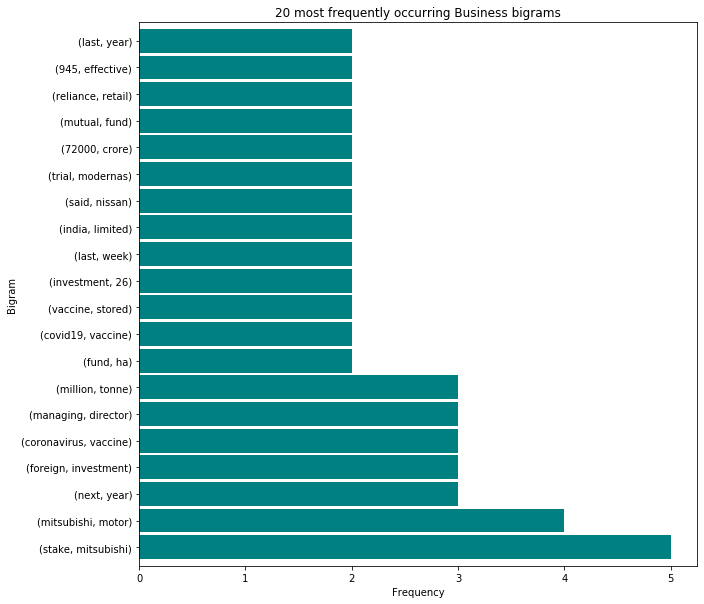

In [86]:
#plt.subplot(121)
business_bigrams.plot.barh(color='teal', width=.9, figsize=(10, 10), alpha=1)
plt.title('20 most frequently occurring Business bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

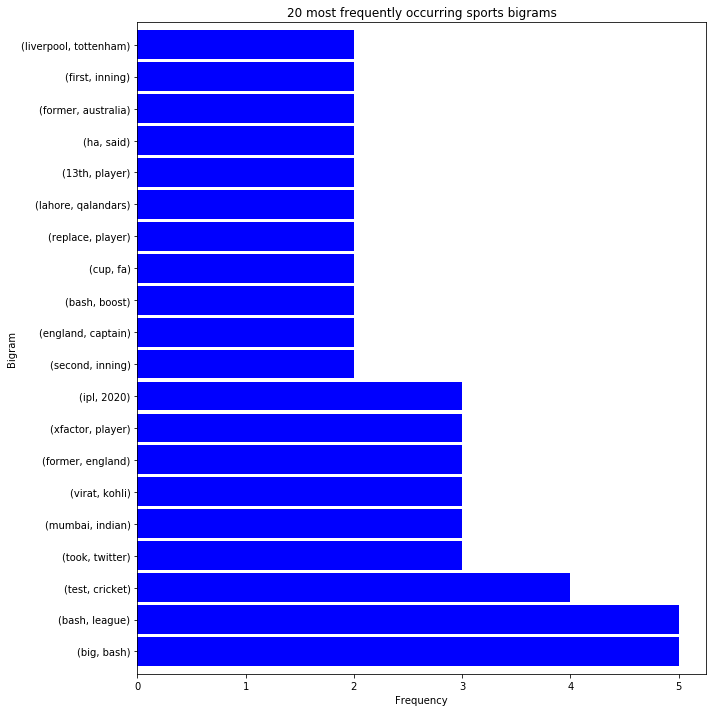

In [91]:
#plt.subplot(122)
sports_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=1)
plt.title('20 most frequently occurring sports bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

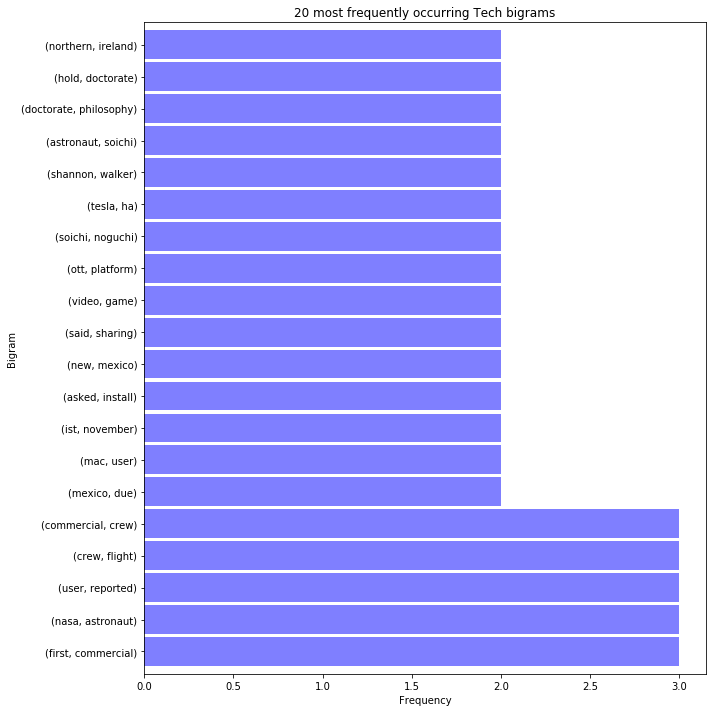

In [92]:
#plt.subplot(131)
tech_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.5)
plt.title('20 most frequently occurring Tech bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

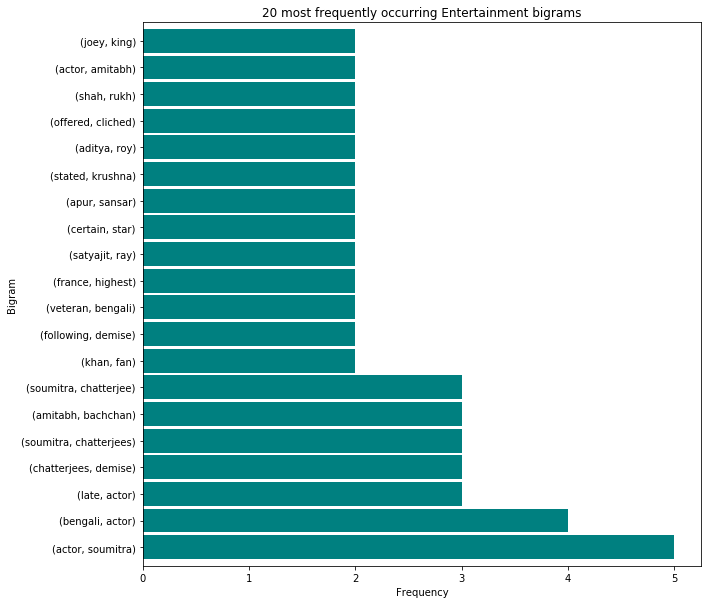

In [89]:
#plt.subplot(132)
ent_bigrams.plot.barh(color='teal', width=.9, figsize=(10, 10), alpha=1)
plt.title('20 most frequently occurring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
#plt.tight_layout()
plt.show()

### We can use these bigrams to make a word cloud as well, with a little more effort.

In [79]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}
data

{'stake mitsubishi': 5,
 'mitsubishi motor': 4,
 'next year': 3,
 'foreign investment': 3,
 'coronavirus vaccine': 3,
 'managing director': 3,
 'million tonne': 3,
 'fund ha': 2,
 'covid19 vaccine': 2,
 'vaccine stored': 2,
 'investment 26': 2,
 'last week': 2,
 'india limited': 2,
 'said nissan': 2,
 'trial modernas': 2,
 '72000 crore': 2,
 'mutual fund': 2,
 'reliance retail': 2,
 '945 effective': 2,
 'last year': 2}

(-0.5, 799.5, 399.5, -0.5)

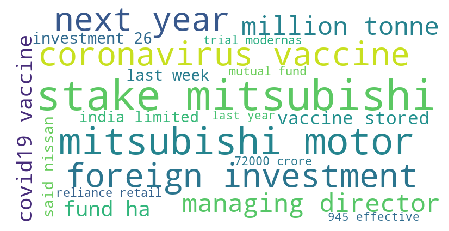

In [80]:
img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

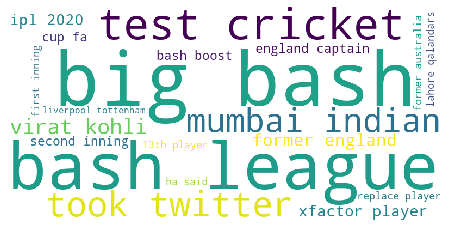

In [97]:
data1 = {k[0] + ' ' + k[1]: v for k, v in sports_bigrams.to_dict().items()}
img1 = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data1)
plt.figure(figsize=(8, 4))
plt.imshow(img1)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

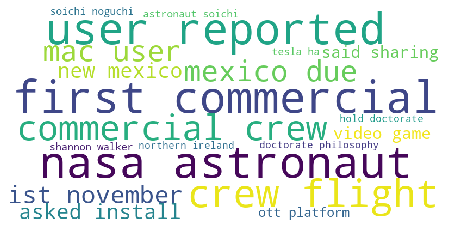

In [98]:
data2 = {k[0] + ' ' + k[1]: v for k, v in tech_bigrams.to_dict().items()}
img2 = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data2)
plt.figure(figsize=(8, 4))
plt.imshow(img2)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

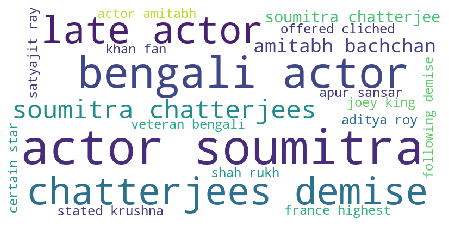

In [99]:
data3 = {k[0] + ' ' + k[1]: v for k, v in ent_bigrams.to_dict().items()}
img3 = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data3)
plt.figure(figsize=(8, 4))
plt.imshow(img3)
plt.axis('off')

## Feature Extraction

1. Word count: how many words appear in each document
2. Term Frequency (TF): How often a word appears in a document.
3. Inverse Document Frequency (IDF): How much information a word provides, based on how commonly a word appears across multiple documents. The more frequently a word appears, the lower the IDF for that word will be. $$
\mbox{idf}(\mbox{word})
=
\log\left(\frac{\mbox{# of documents}}{\mbox{# of documents containing the word}}\right)
$$

4. Term Frequency - Inverse Document Frequency (TF-IDF): The multiplication of the two measures above. A word that has a high frequency in a document will have a high TF. If it appears in many other documents, than the information the word provides, or uniqueness of that word, is lowered. This is done mathematically by multiplying by the IDF, which will approach 0 and the number of documents with the word increases. 

### Term Frequency

Term frequency describes how frequently a word appears **in a document**. It can be calculated in a number of ways:

- **Raw Count**: The count of the number of occurences of each word **in the document**.

- **Frequency**: The number of times each word appears divided by the total number of words **in the document**.
    
- **Augmented Frequency**: The frequency of each word divided by the maximum frequency **in the document**. This can help prevent bias towards larger documents.